In [203]:
!pip install seaborn --upgrade
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
pd.set_option('display.mpl_style', 'default')
%matplotlib inline

Requirement already up-to-date: seaborn in /Users/owner/anaconda/lib/python2.7/site-packages


In [537]:
#Importing the data for analysis.
import csv

titanic_data = pd.read_csv('titanic.csv')

In [637]:
#Reading the column headings/titles.

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [635]:
1+1

2

In [450]:
#Just practicing ways to view the data.
#Viewing the number of data entries in each column that are non-null.

print titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB
None


In [451]:
#More practice on viewing columns
for col in titanic_data:
    print col

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [452]:
#Question 1: How many passengers are in our passenger list?
##Answer: 891

print titanic_data['PassengerId'].describe()

count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64


In [453]:
#Another way to count without all of the noise.

print titanic_data.PassengerId.count()

891


In [454]:
#Question 2: What is the overall survival rate?
##Answer 38.4%

print titanic_data['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64


In [455]:
#Another way to view the overall survival rate.

print titanic_data['Survived'].mean()

0.383838383838


Sex
female    314
male      577
Name: PassengerId, dtype: int64


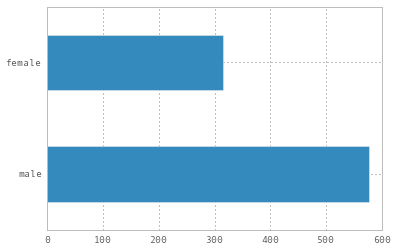

In [638]:
#Questions 3: How many male passengers were onboard?
##Answer Q3: 577
#Question 4: How many female passengers were onboard?
##Answer Q4: 314

###Question: Why does the Axes information appear below?

titanic_data['Sex'].value_counts().plot(kind = 'barh')

Gender_Breakdown = titanic_data.groupby('Sex').count()
print Gender_Breakdown['PassengerId']

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)


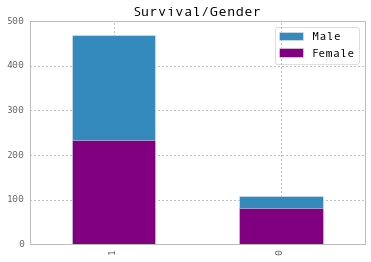

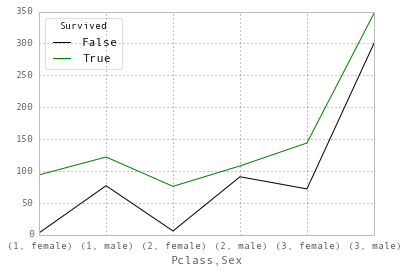

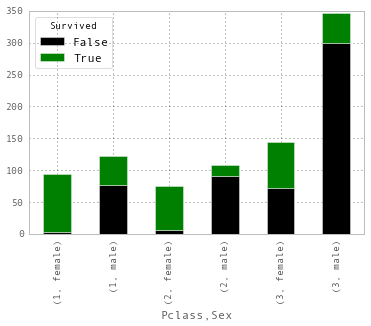

In [647]:
#Question 5: What is the overall survival rate of male passengers?
##Answer 5: 18.89%
#Question 6: What is the overall survival rate of female passengers?
##Answer 6: 74.20%

#First plotted Survival (Survived v.Died).

# titanic_data.Survived.value_counts().plot(kind='bar', color="gray", alpha=.65)
# ax.set_ylim(-1, len(titanic_data.Survived.value_counts())) 
# plt.title("Survival (1 = Survived, 0 = Died)")

#Created a function that grouped (or categorized) the Sex column and then calculated the mean.
#Printed the function using the Survived column.
grouped = titanic_data.groupby('Sex').mean()
print grouped['Survived']

#Male v. Female survival.

titanic_data.Survived[titanic_data.Sex == 'male'].value_counts().plot(kind='bar',label='Male')
titanic_data.Survived[titanic_data.Sex == 'female'].value_counts().plot(kind='bar', color='purple',label='Female')
plt.title("Survival/Gender"); plt.legend(loc='best')

###Qusetion: Why am I getting gray for none?

#Wanted to see the survival rate by gender and class (line chart).

survival_rate = pd.crosstab([titanic_data.Pclass, titanic_data.Sex], titanic_data.Survived.astype(bool))
print survival_rate.plot(kind='line', stacked=True, color=['black','green'], grid=True);

#Wanted to see the survival rate by gender and class (bar chart).

survival_rate = pd.crosstab([titanic_data.Pclass, titanic_data.Sex], titanic_data.Survived.astype(bool))
print survival_rate.plot(kind='bar', stacked=True, color=['black','green'], grid=True);

In [645]:
#Question 7: What is the average age of all passengers onboard? #How did you deal with this?
##Answer: 29.69

titanic_data['Age'].mean()

29.69911764705882

In [642]:
titanic_data.Age.fillna(29.69)

0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
5      29.69
6      54.00
7       2.00
8      27.00
9      14.00
10      4.00
11     58.00
12     20.00
13     39.00
14     14.00
15     55.00
16      2.00
17     29.69
18     31.00
19     29.69
20     35.00
21     34.00
22     15.00
23     28.00
24      8.00
25     38.00
26     29.69
27     19.00
28     29.69
29     29.69
       ...  
861    21.00
862    48.00
863    29.69
864    24.00
865    42.00
866    27.00
867    31.00
868    29.69
869     4.00
870    26.00
871    47.00
872    33.00
873    47.00
874    28.00
875    15.00
876    20.00
877    19.00
878    29.69
879    56.00
880    25.00
881    33.00
882    22.00
883    28.00
884    25.00
885    39.00
886    27.00
887    19.00
888    29.69
889    26.00
890    32.00
Name: Age, dtype: float64

In [643]:
titanic_data['Age'].mean()

29.69911764705882

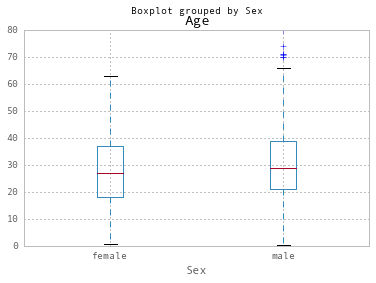

In [538]:
#Age vs. Pclass
titanic_data.boxplot(['Age'], by = 'Sex');

In [603]:
#Question 8: What is the average age of passengers who survived?
##Andwer: 28.34
#Question 9: What is the average age of passengers who did not survive?
##Answer: 30.62

titanic_data.groupby('Survived').Age.describe()

Survived       
0         count    424.000000
          mean      30.626179
          std       14.172110
          min        1.000000
          25%       21.000000
          50%       28.000000
          75%       39.000000
          max       74.000000
1         count    290.000000
          mean      28.343690
          std       14.950952
          min        0.420000
          25%       19.000000
          50%       28.000000
          75%       36.000000
          max       80.000000
dtype: float64

In [596]:
#Question 10: At this (early) point in our analysis, what might you infer about any patterns you are seeing?
##Answer: More females than males survived. The survival rate of the third class was very low.

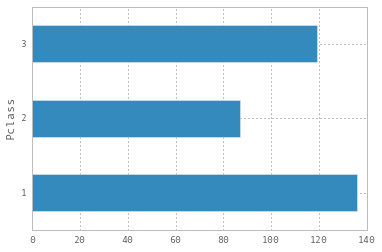

In [595]:
#Question 11: How many passengers are in each of the three classes of service (e.g. First, Second, Third?)
##Answer:

titanic_data.groupby('Pclass').Survived.sum().plot(kind='barh')

In [606]:
#Question 12: What is the survival rate for passengers in each of the three classes of service?
##Answer: P1=62.9%, P2=47.2%, P3=24.23%

titanic_data.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

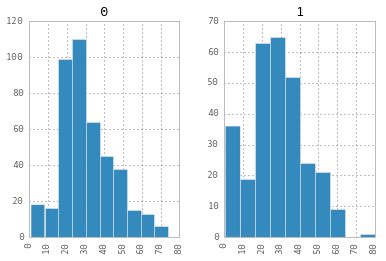

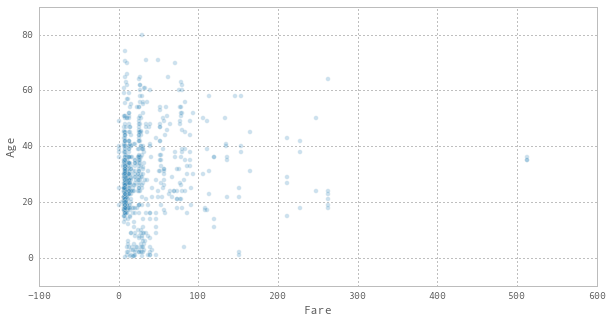

In [612]:
#Question 13: What else might you conclude?

#What was the distribution of age and survival?
titanic_data.hist(column='Age', by='Survived');

#Age vs. Fare
titanic_data.plot(kind='scatter',
        x = 'Fare',
        y ='Age',
        alpha = .25,
        figsize = (10,5))

In [649]:
#Question 14: Last, if we were to build a predictive model, which features in the data do you think we should include in the model and which can we leave out? Why?

titanic_data.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [648]:
Survival = titanic_data['Survived']
Survival.dtype
type(Survival)
type(titanic_data)
titanic_data.groupby('Survived').count()
np.mean(Survival == 0)

0.61616161616161613